In [9]:
suppressMessages(here::i_am('R_analysis/notebooks/Fig2_out_of_sample_fit.ipynb'))
CODE = here::here()
source(glue::glue("{CODE}/R_analysis/init.R"))

In [10]:
# Load functions
local_load('figures/out_of_sample.R')
# Load arguments
local_load('analysis/main_analysis_args.R')

In [ ]:
oos = generate_out_of_sample_plot_df(
    year_min, 2010,
    growing_season_min, growing_season_max,
    GDD_lower, KDD_lower_list,
    temp_lower, temp_upper
)

In [5]:
oos |> write_feather(glue("{CODE}/results/intermediate/out_of_sample_rms_pre-2010.feather"))

In [6]:
oos = read_feather(glue("{CODE}/results/intermediate/out_of_sample_rms_pre-2010.feather"))

In [11]:
mean_oos = oos |>
    select(-iteration) |>
    group_by(clim, crop) |>
    summarize_all(mean) 
for (spec in c('piecewise', 'bins', 'poly', 'tavg')) {
    mean_oos = mean_oos |>
        mutate(!! spec := (1 - !!sym(spec)/baseline)*100)
}
mean_oos = mean_oos |> 
    select(-baseline) |>
    mutate(avg_daily = (piecewise + bins + poly) / 3)
mean_oos

clim,crop,piecewise,bins,poly,tavg,avg_daily
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
era5,corn,12.04157,11.59191,11.70913,4.763116,11.78087
era5,soy,12.66720,12.64979,12.67239,5.875661,12.66313
gmfd,corn,12.09205,11.98870,12.00312,4.982885,12.02796
gmfd,soy,13.22604,13.29690,13.32871,5.819681,13.28389
prism,corn,14.71536,14.66340,14.64455,6.141302,14.67444
prism,soy,15.57651,15.51135,15.70702,7.258987,15.59829


In [6]:
mean_oos = oos |>
    select(-iteration) |>
    group_by(clim, crop) |>
    summarize_all(mean) 
for (spec in c('piecewise', 'bins', 'poly', 'tavg')) {
    mean_oos = mean_oos |>
        mutate(!! spec := (1 - !!sym(spec)/baseline)*100)
}
mean_oos = mean_oos |> 
    select(-baseline) |>
    mutate(avg_daily = (piecewise + bins + poly) / 3)
mean_oos

clim,crop,piecewise,bins,poly,tavg,avg_daily
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
era5,corn,11.96979,11.54464,11.65051,4.817563,11.72165
era5,soy,12.80425,12.77080,12.79555,5.817793,12.79020
gmfd,corn,12.19238,12.09219,12.11612,4.768952,12.13356
gmfd,soy,13.26344,13.34192,13.37414,5.756214,13.32650
prism,corn,14.75669,14.73609,14.72427,5.869212,14.73902
prism,soy,15.60107,15.51405,15.70863,7.165607,15.60792


In [7]:
ttest = oos |>
    mutate(rmse = (
        (1 - piecewise/baseline)*100 +
        (1 - bins/baseline)*100 +
        (1 - poly/baseline)*100 ) /3 ) |>
    select(iteration, clim, crop, rmse) |>
    spread(clim, rmse) |>
    group_by(crop) |>
    summarize(
        era5_val = (mean(era5) - mean(prism)) / mean(prism),
        era5_p = t.test(unlist(prism), unlist(era5))$p.value,
        gmfd_val = (mean(gmfd) - mean(prism)) / mean(prism),
        gmfd_p = t.test(unlist(prism), unlist(gmfd))$p.value,
        era5_gmfd_p = t.test(unlist(era5), unlist(gmfd))$p.value
    )
ttest

crop,era5_val,era5_p,gmfd_val,gmfd_p,era5_gmfd_p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
corn,-0.2052306,3.020647e-45,-0.1858730,6.798076e-38,0.178261057
soy,-0.1926269,5.768195e-51,-0.1507435,1.605169e-32,0.001119765


In [16]:
names(t.test(ttest$prism, ttest$gmfd))

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

In [18]:
t.test(ttest$prism, ttest$gmfd)$estimate

mean of x mean of y 
 14.98735  12.34785

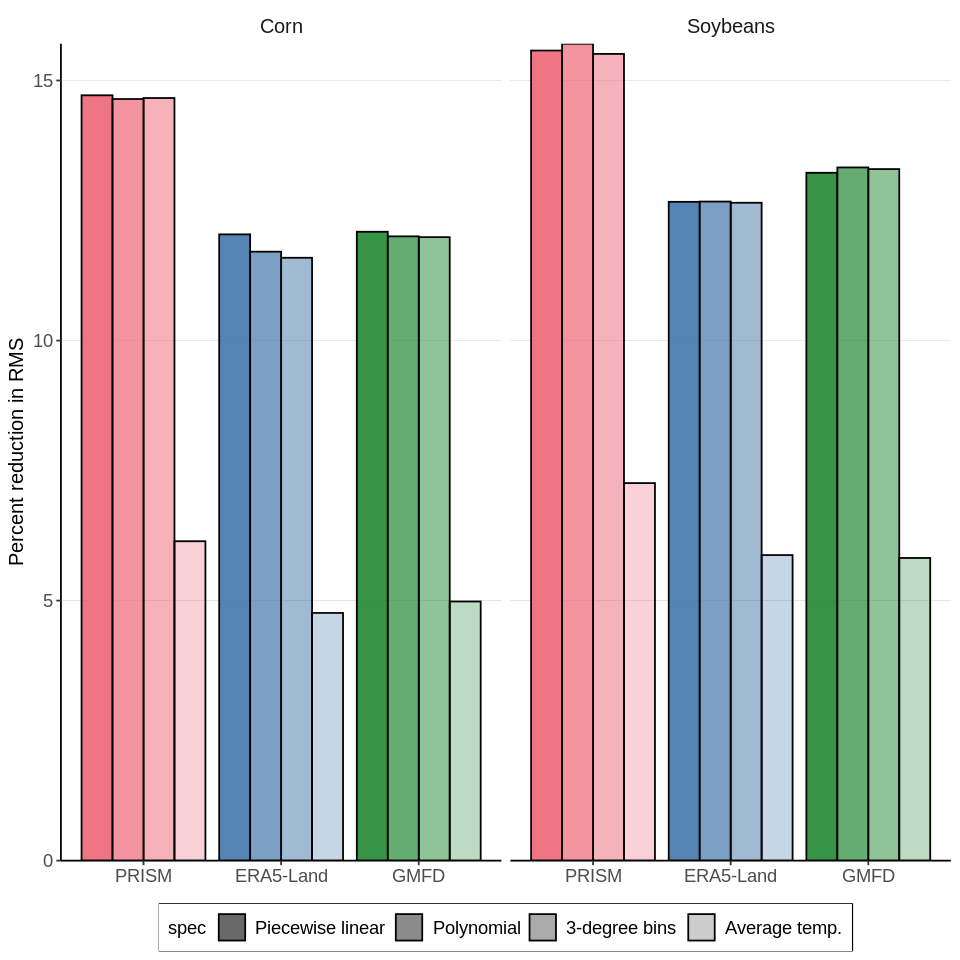

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
plot = plot_rms(oos)
plot

In [8]:
ggsave(glue("{CODE}/results/figures/Fig2_out_of_sample_pre-2010.pdf"), plot, width=8, height=8)

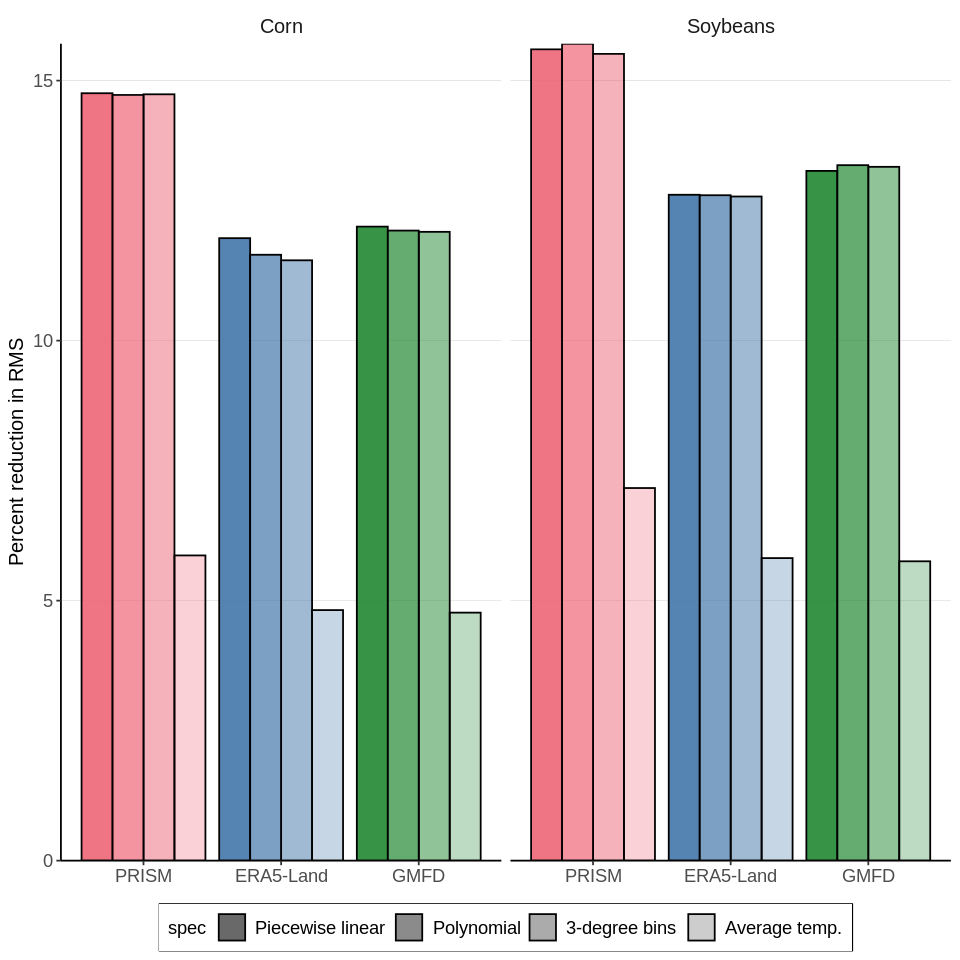

In [7]:
options(repr.plot.width=8, repr.plot.height=8)
plot = plot_rms(oos)
plot

In [ ]:
ggsave

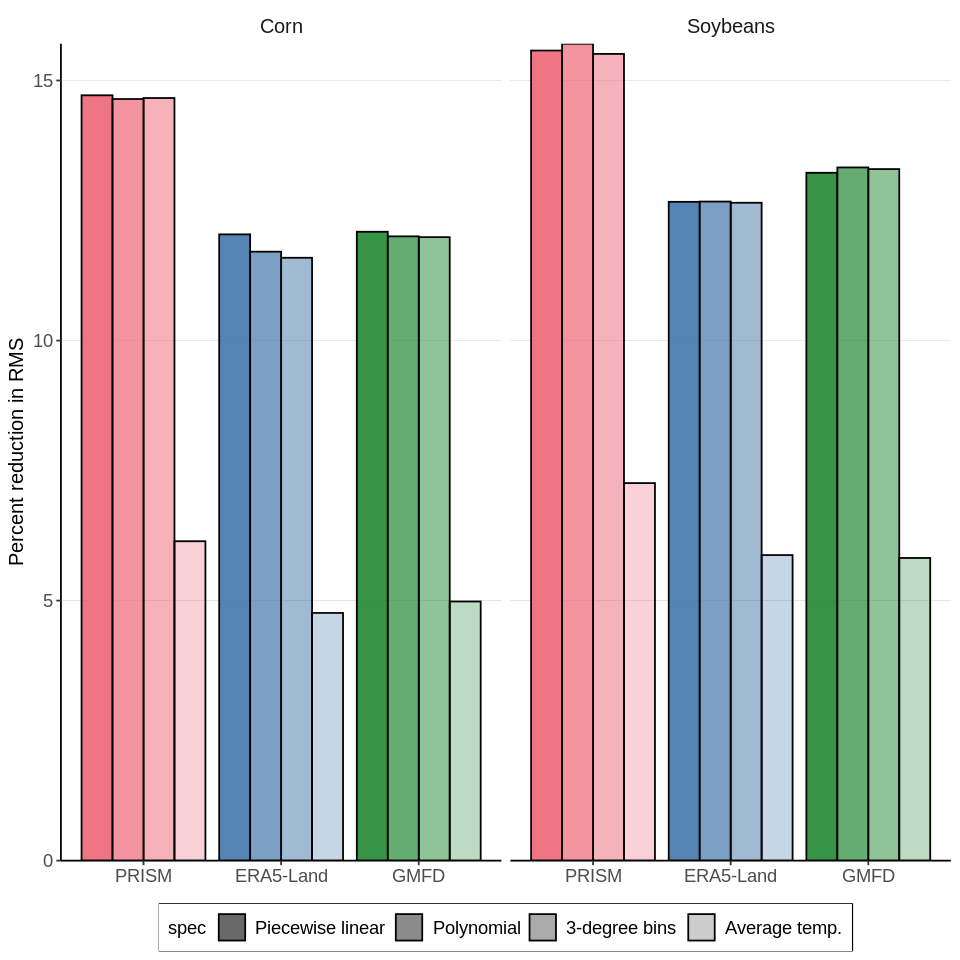

In [6]:
options(repr.plot.width=8, repr.plot.height=8)
plot = plot_rms(oos)
plot

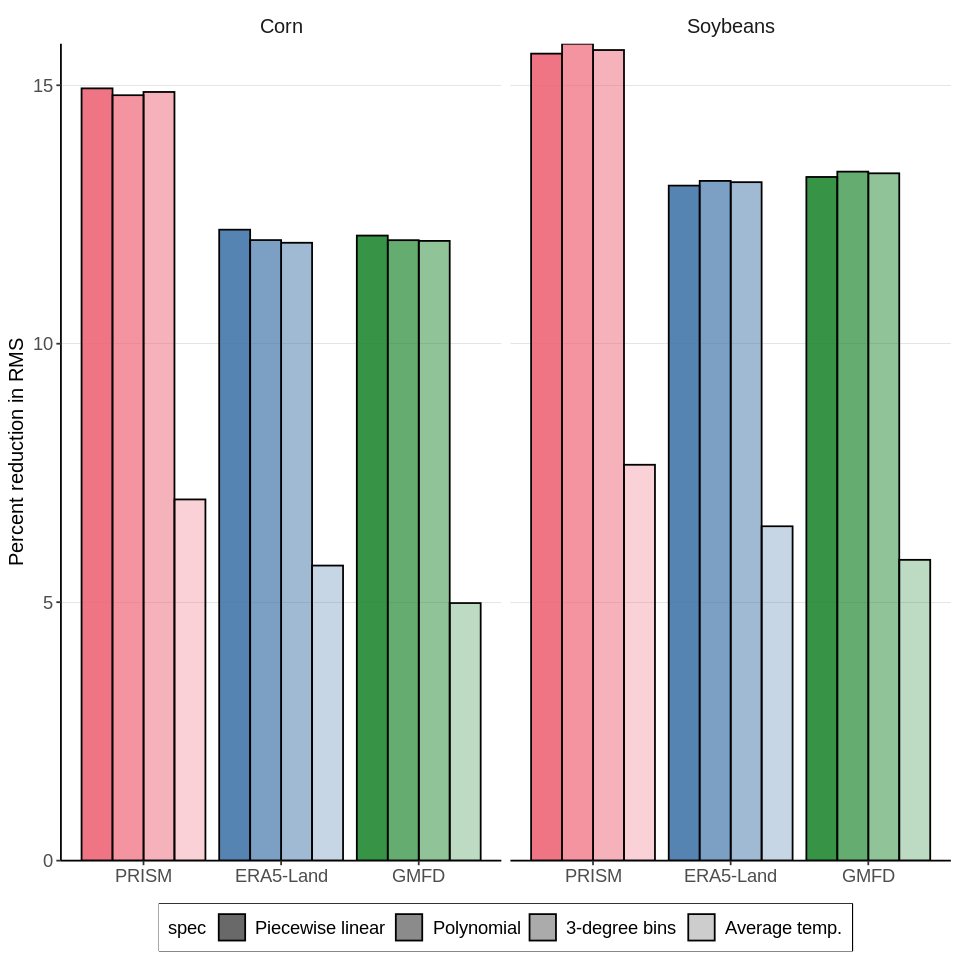

In [14]:
options(repr.plot.width=8, repr.plot.height=8)
plot = plot_rms(oos)
plot

In [15]:
ggsave(glue("{CODE}/results/figures/Fig2_out_of_sample.pdf"), plot, width=8, height=8)